In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
traindf = pd.read_csv('TaxiFare.csv', na_values={"pickup_datetime":"43"})
traindf.head()
traindf = traindf.drop(["unique_id"], axis=1)
traindf.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [3]:
traindf.isna().sum()

amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [4]:
traindf.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [5]:
traindf['amount'] = pd.to_numeric(traindf['amount'], errors='coerce')

In [6]:
traindf['date_time_of_pickup'] = pd.to_datetime(traindf['date_time_of_pickup'], format='%Y-%m-%d %H:%M:%S UTC')

In [7]:
traindf['Hour'] = traindf['date_time_of_pickup'].dt.hour
traindf['minute'] = traindf['date_time_of_pickup'].dt.minute
traindf['date'] = traindf['date_time_of_pickup'].dt.day
traindf['day'] = traindf['date_time_of_pickup'].dt.dayofweek
traindf['month'] = traindf['date_time_of_pickup'].dt.month
traindf['year'] = traindf['date_time_of_pickup'].dt.year

In [8]:
traindf.head()

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,Hour,minute,date,day,month,year
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,17,26,15,0,6,2009
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,16,52,5,1,1,2010
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,0,35,18,3,8,2011
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,4,30,21,5,4,2012
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,7,51,9,1,3,2010


In [9]:
traindf.drop(traindf[traindf['date_time_of_pickup'].isna()].index, inplace=True)

In [10]:
traindf.drop('date_time_of_pickup', axis=1, inplace=True)

In [11]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')


imputer.fit(traindf[['amount','no_of_passenger']])
traindf[['amount','no_of_passenger']] = imputer.transform(traindf[['amount','no_of_passenger']])

In [12]:
traindf.isna().sum()

amount                  0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
Hour                    0
minute                  0
date                    0
day                     0
month                   0
year                    0
dtype: int64

In [13]:
traindf.shape

(50000, 12)

<Axes: ylabel='no_of_passenger'>

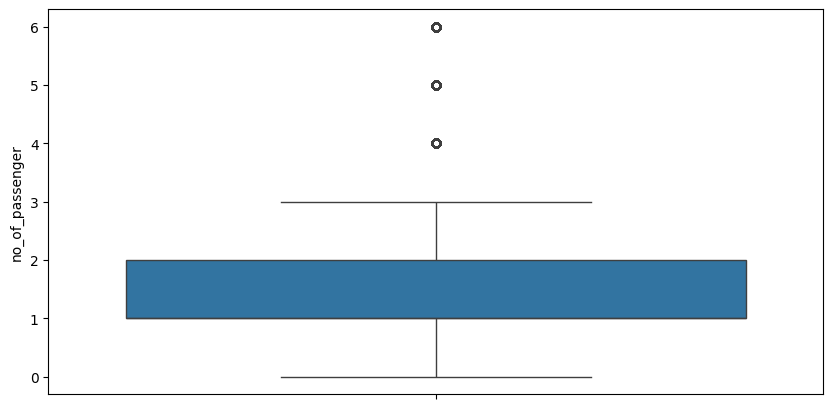

In [14]:
plt.figure(figsize=(10,5))
sns.boxplot(y=traindf['no_of_passenger'])

<Axes: ylabel='amount'>

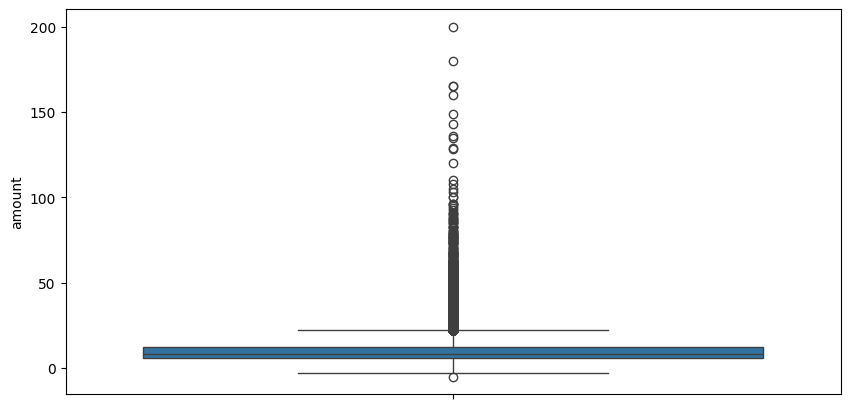

In [15]:
plt.figure(figsize=(10,5))
sns.boxplot(y=traindf['amount'])

In [16]:
Q1 = traindf['no_of_passenger'].quantile(0.25)
Q3 = traindf['no_of_passenger'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
print('Lower :',lower)
print('Upper :',upper)

Lower : -0.5
Upper : 3.5


In [17]:
traindf['no_of_passenger'].sort_values(ascending=True).head(10)

9159     0.0
16975    0.0
5517     0.0
25021    0.0
25023    0.0
18724    0.0
5058     0.0
44277    0.0
15554    0.0
10642    0.0
Name: no_of_passenger, dtype: float64

In [18]:
traindf['amount'].sort_values(ascending=True).head(10)

42337   -5.00
13032   -3.00
2039    -2.90
36722   -2.50
2486    -2.50
28839   -2.50
47302    0.00
10002    0.00
27891    0.00
2780     0.01
Name: amount, dtype: float64

In [19]:
traindf.drop(traindf[traindf['amount'] > 150 ].index, inplace = True)
traindf.drop(traindf[traindf['amount'] == 0 ].index, inplace = True)
traindf.drop(traindf[traindf['amount'].isna() ].index, inplace = True)

In [20]:
traindf.drop(traindf[traindf['latitude_of_pickup'] > 90].index, inplace=True)
traindf.drop(traindf[traindf['latitude_of_pickup'] < -90].index, inplace=True)
traindf.drop(traindf[traindf['latitude_of_dropoff'] > 90].index, inplace=True)
traindf.drop(traindf[traindf['latitude_of_dropoff'] < -90].index, inplace=True)

In [21]:
traindf.drop(traindf[traindf['longitude_of_pickup'] > 180].index, inplace=True)
traindf.drop(traindf[traindf['longitude_of_pickup'] < -180].index, inplace=True)
traindf.drop(traindf[traindf['longitude_of_dropoff'] > 180].index, inplace=True)
traindf.drop(traindf[traindf['longitude_of_dropoff'] < -180].index, inplace=True)

In [22]:
traindf.shape

(49991, 12)

In [23]:
traindf.isna().sum()

amount                  0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
Hour                    0
minute                  0
date                    0
day                     0
month                   0
year                    0
dtype: int64

In [24]:
from math import *

def haversine(a):
    lon1=a[0]
    lat1=a[1]
    lon2=a[2]
    lat2=a[3]
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c =  2 * asin(sqrt(a))
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

In [25]:
traindf['distance'] = traindf[['longitude_of_pickup','latitude_of_pickup','longitude_of_dropoff','longitude_of_dropoff']].apply(haversine,axis=1)

In [26]:
traindf.drop(['longitude_of_pickup','latitude_of_pickup','longitude_of_dropoff','latitude_of_dropoff'], axis=1, inplace=True)

In [27]:
traindf['Hour'] = traindf['Hour'].astype('int64')
traindf['minute'] = traindf['minute'].astype('int64')
traindf['date'] = traindf['date'].astype('int64')
traindf['day'] = traindf['day'].astype('int64')
traindf['month'] = traindf['month'].astype('int64')
traindf['year'] = traindf['year'].astype('int64')

In [28]:
traindf.head()

,amount,no_of_passenger,Hour,minute,date,day,month,year,distance
0,4.5,1.0,17,26,15,0,6,2009,12738.816488
1,16.9,1.0,16,52,5,1,1,2010,12753.009931
2,5.7,2.0,0,35,18,3,8,2011,12759.897170
3,7.7,1.0,4,30,21,5,4,2012,12756.805717
4,5.3,1.0,7,51,9,1,3,2010,12756.800516


In [29]:
traindf['distance'].sort_values(ascending=True).head(10)

19154    0.0
34946    0.0
32198    0.0
19280    0.0
19289    0.0
34938    0.0
19458    0.0
29222    0.0
45392    0.0
19484    0.0
Name: distance, dtype: float64

In [30]:
traindf.drop(traindf[traindf['distance'] >= 130].index, inplace=True)
traindf.drop(traindf[traindf['distance'] <= 0 ].index, inplace=True)

In [31]:
traindf.head()

,amount,no_of_passenger,Hour,minute,date,day,month,year,distance
1181,25.0,2.0,0,21,11,3,10,2012,2.975059
33889,6.5,2.0,22,34,5,5,12,2009,1.918332


<Axes: ylabel='no_of_passenger'>

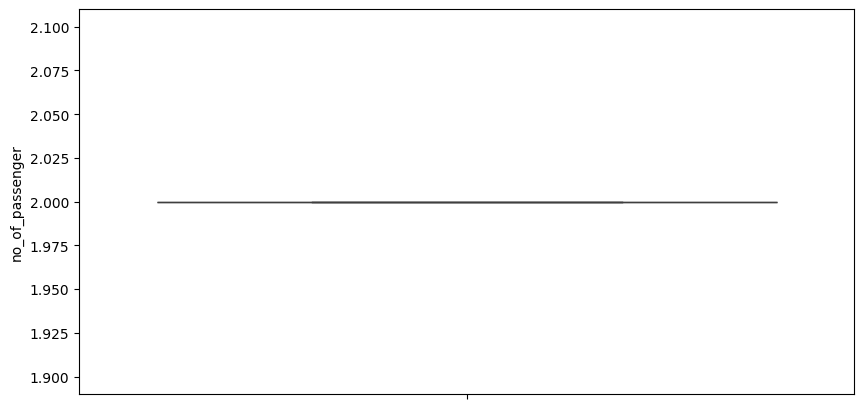

In [32]:
plt.figure(figsize=(10,5))
sns.boxplot(y=traindf['no_of_passenger'])

<Axes: ylabel='amount'>

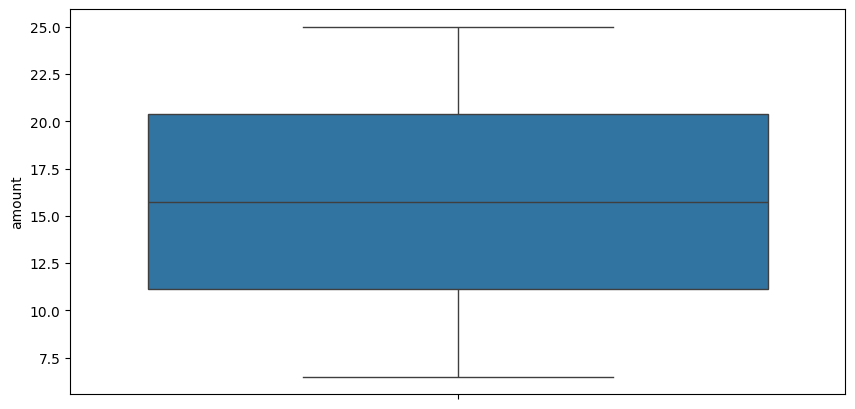

In [33]:
plt.figure(figsize=(10,5))
sns.boxplot(y=traindf['amount'])

<Axes: ylabel='distance'>

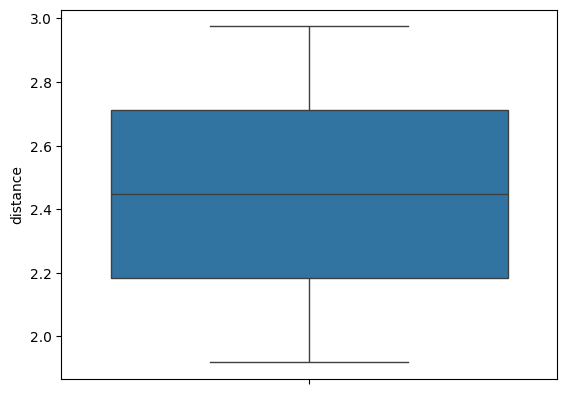

In [34]:
sns.boxplot(y=traindf['distance'])

In [35]:
traindf.describe()


,amount,no_of_passenger,Hour,minute,date,day,month,year,distance
count,2.000000,2.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000
mean,15.750000,2.0,11.000000,27.500000,8.000000,4.000000,11.000000,2010.50000,2.446696
std,13.081475,0.0,15.556349,9.192388,4.242641,1.414214,1.414214,2.12132,0.747219
min,6.500000,2.0,0.000000,21.000000,5.000000,3.000000,10.000000,2009.00000,1.918332
25%,11.125000,2.0,5.500000,24.250000,6.500000,3.500000,10.500000,2009.75000,2.182514
50%,15.750000,2.0,11.000000,27.500000,8.000000,4.000000,11.000000,2010.50000,2.446696
75%,20.375000,2.0,16.500000,30.750000,9.500000,4.500000,11.500000,2011.25000,2.710878
max,25.000000,2.0,22.000000,34.000000,11.000000,5.000000,12.000000,2012.00000,2.975059


In [36]:
traindf.columns

Index(['amount', 'no_of_passenger', 'Hour', 'minute', 'date', 'day', 'month',
       'year', 'distance'],
      dtype='object')

In [37]:
traindf['no_of_passenger'] = traindf['no_of_passenger'].astype('int64')

In [38]:
traindf.head()

,amount,no_of_passenger,Hour,minute,date,day,month,year,distance
1181,25.0,2,0,21,11,3,10,2012,2.975059
33889,6.5,2,22,34,5,5,12,2009,1.918332


In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(traindf.drop('amount', axis=1),
                                                   traindf['amount'], test_size=0.4, random_state = 42)

In [40]:
X_test

,no_of_passenger,Hour,minute,date,day,month,year,distance
33889,2,22,34,5,5,12,2009,1.918332


In [41]:
X_train

,no_of_passenger,Hour,minute,date,day,month,year,distance
1181,2,0,21,11,3,10,2012,2.975059


In [42]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(criterion='friedman_mse', random_state=42)

In [43]:
model.fit(X_train, y_train)

RandomForestRegressor(criterion='friedman_mse', random_state=42)

In [50]:
y_pred_test = model.predict(X_test)
y_pred_test

array([25.])

In [53]:
from sklearn.metrics import mean_absolute_error,mean_squared_error



print("MAE = ",mean_absolute_error(y_test, y_pred_test))
print("MSE = ",mean_squared_error(y_test, y_pred_test))



MAE =  18.5
MSE =  342.25
